# Lattice Path Integral Monte Carlo (PIMC)

In [1]:
import numpy as np
import bisect
import matplotlib.pyplot as plt
import pimc # custom module

## Creating a random initial configuration of bosons

In [2]:
# Simulation parameters
N = 2
L = N*2   # half-filling
t = 0
U = 100
mu = 0
    
# PIMC parameters
beta = 1
eta = L*beta      # worm end fugacity

alpha = pimc.random_boson_config(L,N)
alpha

array([2, 0, 0, 0])

## Data Structure
To store the worldline configurations, it will only be necessary to know for each site: i) the imaginary times at which kinks happened ii) the number of particles after the kink and iii) the direction of the kink. Python lists can be used to keep track of these.

In [3]:
alpha = pimc.random_boson_config(L,N)
print("\n | alpha > = ", alpha)

data_struct = pimc.create_data_struct(alpha)
print("\n Data Structure: ", data_struct)


 | alpha > =  [0 0 1 1]

 Data Structure:  [[[0, 0, (0, 0)]], [[0, 0, (1, 1)]], [[0, 1, (2, 2)]], [[0, 1, (3, 3)]]]


### Visualizing the data structure
The file 'view_worldlines.py' in this directory, contains a function of the same name that will generate a visualization of the worldline configurations. The view_worldlines function will take as an argument, the data structure and $\beta$. Optionally, the figure can be saved by giving including the desired filename, with the desired extensios, as a parameter.


| alpha > =  [0 0 1 1]


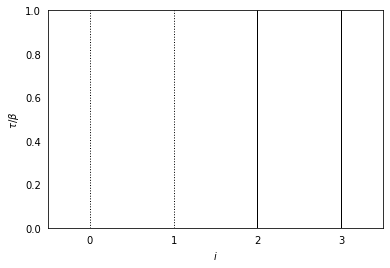

In [4]:
print("\n| alpha > = ", alpha)

beta = 1.0
pimc.view_worldlines(data_struct,beta,figure_name=None)

## Updates

Here we will illustrate the set of ergodic updates that will modify the data structure to generate new worldline configurations.

### Insert Worm

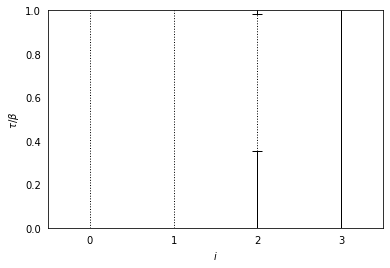

In [25]:
data_struct = pimc.create_data_struct(alpha)
head_loc = []
tail_loc = []
pimc.worm_insert(data_struct, beta, head_loc, tail_loc, U, mu, eta)
pimc.view_worldlines(data_struct,beta,figure_name=None)

### Timeshift

Length ratio:  44.07891574136378


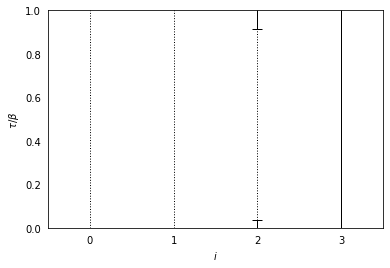

tau_head = 0.03795575
tau_tail = 0.91444448


In [34]:
pimc.worm_timeshift(data_struct,beta,head_loc,tail_loc, U, mu)
pimc.view_worldlines(data_struct,beta,figure_name=None)
print("tau_head = %.8f"%(data_struct[head_loc[0]][head_loc[1]][0]))
print("tau_tail = %.8f"%(data_struct[tail_loc[0]][tail_loc[1]][0]))

### Delete Worm

(0, 1) (0, 2)


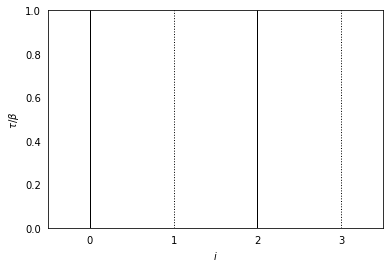

In [105]:
pimc.worm_delete(data_struct, beta, head_loc, tail_loc, U, mu, eta)
pimc.view_worldlines(data_struct,beta,figure_name=None)